<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/Updated_Hypergraph_Models_071923_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [2]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = len(degrees)-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [3]:
def build_hypergraph(n, gamma, kmin, num_hyper_edges):
    # Step 1: Generate Degree Sequence
    degrees = generate_degree_sequence(n, gamma, kmin)
    print("Degree Sequence: ", degrees)

    # Step 2: Generate Hyper Edge Size Sequence
    hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
    print("Hyper Edge Sizes: ", hyper_edge_sizes)

    # Step 3: Create Copies of Nodes
    node_copies = create_node_copies(degrees)

    # Step 4: Create Copies of Hyper Edges
    hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

    # Step 5: Randomly Pair Copies
    pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

    # Step 6: Convert Bipartite Graph to Hypergraph
    hyperedge_dict = convert_to_hypergraph(pairs)

    # Print the resulting hypergraph
    print("Hypergraph Dictionary: ", hyperedge_dict)

    return degrees, hyperedge_dict


In [4]:
!pip install hypernetx
import hypernetx as hnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you ha

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


Degree Sequence:  [5, 5, 3, 3, 4, 3, 6, 3, 4, 4, 3, 4, 3, 4, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [36, 20, 34, 24, 40, 36, 4, 27]
Hypergraph Dictionary:  {0: [13, 17, 3, 41, 37, 22, 28, 29, 37, 3, 29, 45, 35, 5, 8, 6, 24, 12, 14, 47, 2, 48, 23, 34, 3, 1, 6, 21, 48], 2: [7, 40, 0, 6, 11, 25, 1, 37, 33, 49, 17, 43, 9, 15, 31, 36, 21, 1, 6, 19, 20, 38, 42, 40, 15, 18, 8], 3: [6, 16, 45, 38, 45, 15, 42, 26, 15, 31, 34, 49, 39, 46, 15, 22, 10], 5: [46, 9, 30, 43, 11, 44, 27, 14, 2, 25, 49, 22, 8, 0, 42, 14, 30, 21, 20, 35, 39, 32, 24, 36, 23, 19, 39, 1, 13], 4: [41, 43, 27, 38, 9, 26, 25, 15, 6, 40, 27, 12, 23, 33, 31, 4, 16, 33, 13, 5, 2, 18, 20, 11, 48], 7: [15, 47, 7, 12, 10, 46, 1, 17, 44, 0, 28, 0, 16, 24, 29, 36, 28, 5, 41, 47, 44, 0, 32, 4], 1: [9, 4, 13, 30, 11, 4, 10, 32, 7, 34, 35, 26, 8], 6: [19, 18]}


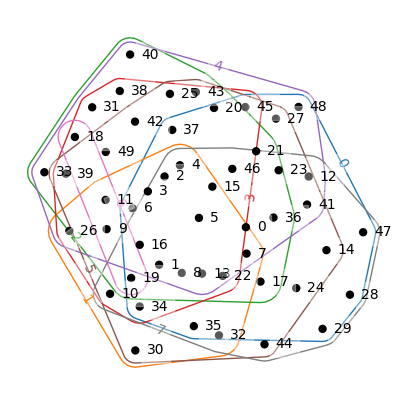

In [6]:
# Test 1
n =50  # Number of nodes
gamma = 2.5  # Power-law exponent
kmin = 3  # Minimum degree
num_hyper_edges = 8  # Desired number of hyper edges

degrees, hyperedge_dict = build_hypergraph(n, gamma, kmin, num_hyper_edges)
# Plot the hypergraph
H = hnx.Hypergraph(hyperedge_dict)
plt.subplots(figsize=(5,5))
hnx.draw(H)

In [7]:
# Test 2
n2 =400  # Number of nodes
gamma2 = 2.25  # Power-law exponent
kmin2 = 3  # Minimum degree
num_hyper_edges2 = 100  # Desired number of hyper edges

degrees2, hyperedge_dict2 = build_hypergraph(n2, gamma2, kmin2, num_hyper_edges2)
H2 = hnx.Hypergraph(hyperedge_dict2)

Degree Sequence:  [18, 7, 6, 4, 19, 4, 5, 7, 3, 6, 3, 3, 15, 11, 15, 3, 4, 6, 3, 5, 6, 6, 8, 10, 4, 3, 9, 4, 3, 4, 7, 3, 6, 5, 3, 6, 4, 3, 3, 10, 11, 10, 3, 3, 3, 5, 8, 3, 7, 5, 3, 7, 3, 4, 3, 4, 10, 3, 18, 3, 7, 3, 10, 3, 4, 12, 7, 4, 9, 5, 3, 4, 3, 7, 4, 20, 8, 3, 3, 6, 6, 3, 5, 3, 7, 4, 3, 7, 4, 4, 8, 4, 18, 3, 5, 5, 3, 6, 11, 3, 7, 3, 3, 5, 3, 3, 3, 3, 4, 6, 6, 3, 4, 3, 4, 3, 3, 5, 6, 4, 3, 5, 3, 3, 4, 6, 4, 15, 3, 9, 4, 4, 4, 17, 3, 3, 3, 6, 3, 8, 5, 3, 4, 5, 3, 3, 5, 4, 6, 5, 5, 3, 9, 3, 3, 3, 3, 4, 6, 3, 14, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [8]:
# Test 3
n3 =400  # Number of nodes
gamma3 = 2.5  # Power-law exponent
kmin3 = 3  # Minimum degree
num_hyper_edges3 = 100  # Desired number of hyper edges

degrees3, hyperedge_dict3 = build_hypergraph(n3, gamma3, kmin3, num_hyper_edges3)
H3 = hnx.Hypergraph(hyperedge_dict3)

Degree Sequence:  [20, 4, 3, 3, 8, 3, 3, 3, 3, 4, 3, 4, 3, 3, 7, 5, 7, 8, 14, 3, 6, 4, 3, 4, 7, 3, 4, 3, 3, 5, 4, 4, 7, 3, 3, 4, 5, 4, 5, 5, 3, 3, 3, 5, 4, 3, 3, 3, 4, 9, 4, 3, 4, 3, 6, 11, 3, 5, 3, 3, 4, 3, 3, 3, 3, 3, 9, 17, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 5, 14, 3, 15, 3, 9, 3, 7, 3, 4, 3, 3, 3, 3, 11, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 7, 4, 3, 3, 11, 5, 4, 3, 3, 15, 3, 9, 3, 3, 6, 3, 3, 4, 7, 7, 3, 3, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [9]:
# Test 4
n4 =400  # Number of nodes
gamma4 = 2.75  # Power-law exponent
kmin4 = 3  # Minimum degree
num_hyper_edges4 = 100  # Desired number of hyper edges

degrees4, hyperedge_dict4 = build_hypergraph(n4, gamma4, kmin4, num_hyper_edges4)
H4 = hnx.Hypergraph(hyperedge_dict4)


Degree Sequence:  [3, 5, 3, 3, 3, 3, 3, 4, 7, 11, 3, 6, 3, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 7, 3, 8, 14, 3, 10, 5, 3, 4, 3, 4, 5, 3, 4, 3, 3, 14, 4, 3, 6, 3, 3, 3, 3, 3, 3, 6, 6, 3, 17, 3, 4, 3, 8, 3, 6, 3, 3, 6, 3, 4, 3, 7, 3, 3, 3, 8, 3, 3, 10, 4, 4, 3, 3, 8, 3, 10, 5, 4, 3, 3, 3, 3, 7, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 5, 5, 4, 3, 3, 17, 3, 3, 7, 3, 3, 10, 3, 3, 14, 3, 3, 3, 4, 4, 6, 7, 6, 3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [10]:
# Test 5
n5 = 400  # Number of nodes
gamma5 = 2.5  # Power-law exponent
kmin5 = 3  # Minimum degree
num_hyper_edges5 = 50  # Desired number of hyper edges

degrees5, hyperedge_dict5 = build_hypergraph(n5, gamma5, kmin5, num_hyper_edges5)
H5 = hnx.Hypergraph(hyperedge_dict5)

Degree Sequence:  [6, 7, 3, 9, 3, 4, 5, 3, 6, 3, 3, 6, 3, 3, 3, 4, 7, 5, 3, 4, 3, 3, 6, 3, 3, 10, 3, 4, 3, 3, 5, 3, 3, 6, 3, 3, 3, 3, 3, 4, 18, 3, 3, 4, 6, 3, 3, 4, 8, 19, 5, 5, 3, 3, 3, 3, 7, 13, 6, 3, 11, 3, 4, 3, 3, 6, 3, 4, 6, 3, 4, 6, 3, 4, 8, 3, 3, 3, 4, 3, 3, 11, 3, 6, 3, 4, 5, 5, 8, 3, 15, 6, 10, 14, 3, 9, 3, 3, 4, 9, 9, 10, 3, 3, 17, 6, 3, 3, 5, 4, 3, 3, 6, 6, 3, 16, 4, 3, 11, 3, 4, 3, 5, 3, 3, 3, 3, 6, 6, 5, 7, 3, 4, 3, 4, 6, 3, 6, 12, 3, 3, 9, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [11]:
# Test 6
n6 = 400  # Number of nodes
gamma6 = 2.5  # Power-law exponent
kmin6 = 3  # Minimum degree
num_hyper_edges6 = 75  # Desired number of hyper edges

degrees6, hyperedge_dict6 = build_hypergraph(n6, gamma6, kmin6, num_hyper_edges6)
H6 = hnx.Hypergraph(hyperedge_dict6)

Degree Sequence:  [5, 7, 3, 4, 5, 3, 3, 3, 10, 4, 7, 3, 3, 3, 8, 4, 4, 16, 4, 3, 7, 3, 3, 5, 3, 3, 3, 3, 3, 20, 3, 3, 7, 4, 3, 3, 6, 4, 6, 4, 3, 4, 13, 3, 3, 6, 3, 3, 3, 7, 8, 3, 8, 14, 4, 4, 4, 4, 4, 6, 3, 3, 4, 3, 5, 11, 5, 8, 4, 4, 3, 3, 3, 4, 5, 3, 4, 6, 4, 6, 3, 4, 3, 6, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 8, 5, 4, 5, 5, 13, 3, 4, 5, 3, 7, 3, 7, 8, 4, 6, 6, 3, 5, 4, 3, 4, 3, 6, 3, 3, 6, 5, 3, 4, 12, 3, 4, 3, 10, 3, 6, 5, 6, 3, 5, 3, 9, 5, 6, 8, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [12]:
# Test 7
n7 =1000  # Number of nodes
gamma7 = 2.5  # Power-law exponent
kmin7 = 3  # Minimum degree
num_hyper_edges7 = 100  # Desired number of hyper edges

degrees7, hyperedge_dict7 = build_hypergraph(n7, gamma7, kmin7, num_hyper_edges7)
H7 = hnx.Hypergraph(hyperedge_dict7)

Degree Sequence:  [11, 3, 4, 4, 4, 9, 15, 3, 5, 16, 3, 4, 5, 3, 12, 3, 5, 16, 3, 4, 3, 5, 4, 3, 5, 5, 4, 3, 16, 3, 5, 3, 13, 7, 3, 6, 4, 8, 3, 3, 3, 3, 10, 3, 3, 14, 26, 3, 5, 3, 3, 3, 3, 3, 3, 4, 5, 5, 30, 3, 6, 3, 6, 8, 9, 3, 3, 29, 3, 3, 12, 7, 4, 4, 3, 4, 8, 5, 6, 4, 3, 6, 5, 3, 3, 7, 9, 4, 3, 3, 6, 4, 8, 6, 10, 12, 6, 3, 3, 3, 3, 3, 3, 4, 5, 3, 6, 7, 3, 5, 14, 13, 6, 3, 3, 3, 3, 3, 7, 4, 8, 5, 3, 3, 3, 3, 4, 13, 3, 4, 4, 3, 8, 7, 3, 3, 5, 5, 4, 24, 5, 5, 11, 3, 6, 5, 3, 9, 3, 17, 3, 3, 3, 3, 7, 5, 5, 3, 3, 3, 5, 3, 6, 9, 3, 3, 4, 5, 4, 3, 3, 4, 3, 11, 6, 10, 6, 3, 5, 3, 3, 5, 14, 13, 5, 10, 3, 8, 3, 3, 4, 4, 19, 3, 5, 3, 3, 4, 3, 3, 8, 4, 5, 5, 3, 3, 3, 5, 3, 3, 4, 6, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 8, 3, 5, 3, 4, 5, 3, 3, 3, 4, 12, 6, 3, 3, 3, 14, 5, 5, 3, 4, 5, 27, 5, 4, 3, 3, 4, 3, 4, 10, 4, 4, 20, 4, 27, 5, 5, 4, 3, 3, 13, 5, 3, 3, 14, 3, 24, 13, 4, 5, 12, 6, 3, 5, 4, 5, 9, 3, 3, 5, 6, 5, 4, 7, 3, 3, 3, 5, 7, 29, 4, 3, 28, 18, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 5, 9, 3, 3, 4, 3, 3

## Part 2: Assign Threshold
The following steps assigns a threshold value to each node in the network. The threshold follows a uniform or normal distribution with predefined mean (mu) and standard deviation (sigma).

In [13]:
import numpy as np
import random

# Defines the parameters to be used
mu = 0.1
sigma = 0.05

# Function to assign thresholds to the individual nodes
def assign_thresholds(hypergraph):
    NV = hypergraph.order()
    Ltre = {}

    for node in hypergraph.nodes():
          # Uniform distribution: #
          #Ltre[node] = np.random.uniform()
          # Normal distrution
          while True:
              threshold = random.gauss(mu, sigma)
              if 0 < threshold < 1:
                  break
          Ltre[node] = threshold

    return Ltre

#Ltre = assign_thresholds(H)

#print("Threshold List for Nodes: ", Ltre )

In [ ]:
Ltre2 = assign_thresholds(H2)

print("Threshold List for Nodes: ", Ltre2 )

Threshold List for Nodes:  {0: 0.05994840320899818, 1: 0.1334621697526982, 2: 0.10058736745875652, 3: 0.09112684545477882, 4: 0.13167287301579098, 5: 0.07010084053768303, 6: 0.19078867756602177, 7: 0.07314751808904728, 8: 0.15417882053075538, 9: 0.0466541902695536, 10: 0.11960346315878394, 11: 0.1087617422800429, 12: 0.05788637767801318, 13: 0.07126985282283106, 14: 0.07527514950322443, 15: 0.10257958852420976, 16: 0.1684352644768507, 17: 0.06705433807726989, 18: 0.10628112423809281, 19: 0.0817865613847473, 20: 0.23389527593376563, 21: 0.08273103315317935, 22: 0.14957152885816077, 23: 0.06609410893346936, 24: 0.09136801073748692, 25: 0.12447141004687678, 26: 0.14042443694553539, 27: 0.05322865975182454, 28: 0.13854554190574045, 29: 0.10959313930998978, 30: 0.09137389653031308, 31: 0.13855205862185355, 32: 0.12216752838157126, 33: 0.10112019545885587, 34: 0.02676627829635038, 35: 0.11684786317697873, 36: 0.19155720400975457, 37: 0.14147270714125704, 38: 0.08398996904977724, 39: 0.027537

## Part 3: Rumor Spreading on Hypergraph
The follow steps extends the basic rumor spreading model to a hypergraph. An infection or recovery event can only happen if its infected or recovered neighbors reach a pre-assigned threshold.  

In [14]:
def rumor_hyperedge_2(nw, ldeg, mu, lam, alp, n_samp):
    t_max = 10000
    N = nw.order()
    kmax = max(ldeg)
    sigma = 0.05
    ltre = assign_thresholds(nw)

    t_end = 0
    stifler_fractions = []

    for i_samp in range(1, n_samp+1):
        t = 0
        N_rec = 0

        states = {j: 0 for j in nw.nodes()}

        inf = []
        rec = []
        initial_node = np.random.choice(list(nw.nodes()))
        states[initial_node] = 1
        inf.append(initial_node)
        N_inf = 1
        N_e = nw.degree(initial_node)

        while N_inf != 0:
            total_rate = lam * N_e + 2 * alp * N_e
            tau = -np.log(np.random.uniform(1e-6, 1)) / total_rate
            t += tau

            if t >= t_max:
                break

            #print("Current time:", t)
            #print("Infected nodes:", inf)
            #print("Recovered nodes:", rec)
            #print("N_inf:", N_inf)
            #print("N_e:", N_e)
            #plt.figure()
            #plot_hypergraph(H, states)

            # Determine which event occurs
            event = np.random.uniform()
            p1 = lam / (lam + 2 * alp)
            p2 = (lam + alp )/ (lam + 2 * alp)

            # Determine if accept selected spreader based on degree distribution
            q_deg = np.random.uniform()


            # Infection:
            if event <= p1:
                # Select a spreader individual to spread the rumor
                inf_node = random.choice(inf)
                if q_deg < ldeg[inf_node] / kmax:
                    # Select a random hyper edge containing the infected node
                    infected_hyper_edge = np.random.choice(list(nw.edges()))
                    neighbors = nw[infected_hyper_edge]
                    while inf_node not in neighbors:
                        infected_hyper_edge = np.random.choice(list(nw.edges()))
                        neighbors = nw[infected_hyper_edge]

                    # Check if any neighbor meets the infection threshold
                    for neighbor in neighbors:
                        # Check if the selected neighbor is ignorant
                            if states[neighbor] == 0:
                                #print("Infection event")
                            # Check the threshold
                                count_inf_neighbors = sum(states[node] == 1 for node in nw.neighbors(neighbor))
                                if count_inf_neighbors / len(nw.neighbors(neighbor)) >= ltre[neighbor]:
                                    states[neighbor] = 1  # ignorant neighbor becomes spreader
                                    inf.append(neighbor)
                                    N_inf += 1
                                    #print("successful infection")


            else:  # Recovery
                # Select a spreader individual to recover
                rec_node = np.random.choice(inf)
                if q_deg < ldeg[rec_node] / kmax:
                    # Select a random hyperedge containing the recovered node
                    recovered_hyper_edge = np.random.choice(list(nw.edges()))
                    # Get neighbors list
                    neighbors = nw[recovered_hyper_edge]
                    #print("Recovery event", neighbors)
                    if event <=p2:
                        count_rec_neighbors = sum(states[node] == 2 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    else:
                        count_rec_neighbors = sum(states[node] == 1 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    """
                    else:
                        for neighbor in neighbors:
                        # Check the threshold of infected
                            count_inf_neighbors = 0
                            for node in neighbors:
                                if states[node] == 1:
                                    count_inf_neighbors += 1
                            if count_inf_neighbors / len(neighbors) >= Ltre[rec_node]:
                                # Update spreader to stifler if the selected neighbor is a stifler
                                states[rec_node] = 2
                                N_inf -= 1
                                N_e -= nw.degree(rec_node)
                                inf.remove(rec_node)
                                rec.append(rec_node)
                                N_rec += 1
                    """
            #print("N_inf after event:", N_inf)
            #print("N_e after event:", N_e)


        if N_inf == 0:
              t_end += t
              stifler_frac = N_rec / N
              stifler_fractions.append(stifler_frac)
              #print("Sampling result - Lam:", lam, "N_rec:", N_rec, "t_end:", t_end, "stifler_frac:", stifler_frac)

    avg_stifler_frac = sum(stifler_fractions) / len(stifler_fractions)
    t_end_av = t_end/n_samp

    #return nw, states
    return avg_stifler_frac, t_end_av

The following function generates the hypergraph based on nodes' disease status, where susceptible nodes are yellow, infected nodes are purple, and recovered nodes are green.

In [15]:
def plot_hypergraph(hypergraph, states):
    pos = nx.spring_layout(hypergraph)
    node_colors = []
    #node_sizes = []
    for node in hypergraph.nodes():
        if states[node] == 1:  # Infected node (purple)
            node_colors.append("purple")
        elif states[node] == 2:  # Recovered node (green)
            node_colors.append("green")
        else:  # Susceptible node (yellow)
            node_colors.append("yellow")
        #node_sizes.append(thresholds[node] * 100)  # Adjust node size based on threshold value

    hnx.drawing.draw(hypergraph, pos, nodes_kwargs={'facecolors': node_colors})

Average result --  mu: 0.0 lam: 0.1 stifler_frac: 0.8466250000000002
Average result --  mu: 0.0 lam: 0.15000000000000002 stifler_frac: 0.8569696969696968
Average result --  mu: 0.0 lam: 0.20000000000000004 stifler_frac: 0.859675
Average result --  mu: 0.0 lam: 0.25000000000000006 stifler_frac: 0.92995
Average result --  mu: 0.0 lam: 0.30000000000000004 stifler_frac: 0.9001749999999998
Average result --  mu: 0.0 lam: 0.3500000000000001 stifler_frac: 0.9101999999999998
Average result --  mu: 0.0 lam: 0.40000000000000013 stifler_frac: 0.9501
Average result --  mu: 0.0 lam: 0.45000000000000007 stifler_frac: 0.9501
Average result --  mu: 0.02 lam: 0.1 stifler_frac: 0.8799750000000002
Average result --  mu: 0.02 lam: 0.15000000000000002 stifler_frac: 0.8782250000000001
Average result --  mu: 0.02 lam: 0.20000000000000004 stifler_frac: 0.9094250000000003
Average result --  mu: 0.02 lam: 0.25000000000000006 stifler_frac: 0.900075
Average result --  mu: 0.02 lam: 0.30000000000000004 stifler_fra

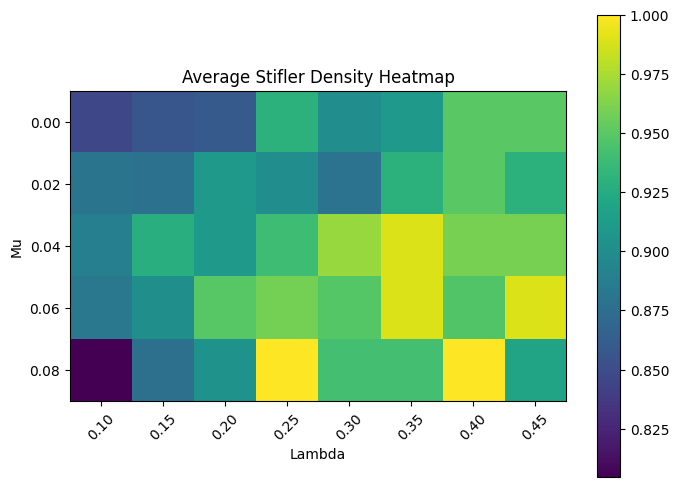

In [17]:
#Test 2
#n = 400, gamma = 2.25, kmin = 3, num_hyper_edges = 100
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.1, 0.02)
lambda_values = np.arange(0.1, 0.5, 0.05)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H2, degrees2, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av
        print("Average result -- ", "mu:", mu, "lam:", lam, "stifler_frac:", rho_R_av)

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='viridis', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

Average result --  mu: 0.0 lam: 0.1 stifler_frac: 0.7266499999999998
Average result --  mu: 0.0 lam: 0.15000000000000002 stifler_frac: 0.8221750000000001
Average result --  mu: 0.0 lam: 0.20000000000000004 stifler_frac: 0.9074250000000004
Average result --  mu: 0.0 lam: 0.25000000000000006 stifler_frac: 0.8395000000000001
Average result --  mu: 0.0 lam: 0.30000000000000004 stifler_frac: 0.8999250000000001
Average result --  mu: 0.0 lam: 0.3500000000000001 stifler_frac: 0.9399500000000001
Average result --  mu: 0.0 lam: 0.40000000000000013 stifler_frac: 0.9101750000000002
Average result --  mu: 0.0 lam: 0.45000000000000007 stifler_frac: 0.970025
Average result --  mu: 0.02 lam: 0.1 stifler_frac: 0.8259500000000002
Average result --  mu: 0.02 lam: 0.15000000000000002 stifler_frac: 0.8707250000000003
Average result --  mu: 0.02 lam: 0.20000000000000004 stifler_frac: 0.9174750000000002
Average result --  mu: 0.02 lam: 0.25000000000000006 stifler_frac: 0.9195500000000003
Average result --  

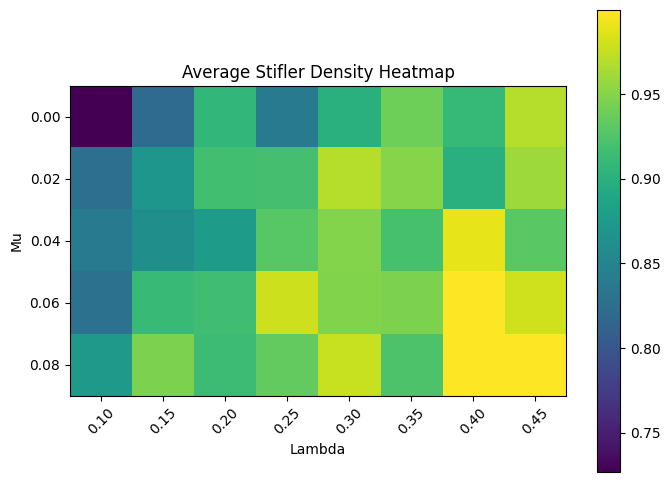

In [18]:
#Test 3
#n = 400, gamma = 2.5, kmin = 3, num_hyper_edges = 100
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.1, 0.02)
lambda_values = np.arange(0.1, 0.5, 0.05)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H3, degrees3, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av
        print("Average result -- ", "mu:", mu, "lam:", lam, "stifler_frac:", rho_R_av)

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='viridis', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

Average result --  mu: 0.0 lam: 0.1 stifler_frac: 0.7904249999999996
Average result --  mu: 0.0 lam: 0.15000000000000002 stifler_frac: 0.8408250000000003
Average result --  mu: 0.0 lam: 0.20000000000000004 stifler_frac: 0.9057249999999999
Average result --  mu: 0.0 lam: 0.25000000000000006 stifler_frac: 0.9178000000000003
Average result --  mu: 0.0 lam: 0.30000000000000004 stifler_frac: 0.94935
Average result --  mu: 0.0 lam: 0.3500000000000001 stifler_frac: 0.9095750000000001
Average result --  mu: 0.0 lam: 0.40000000000000013 stifler_frac: 0.9598249999999999
Average result --  mu: 0.0 lam: 0.45000000000000007 stifler_frac: 0.9698250000000002
Average result --  mu: 0.02 lam: 0.1 stifler_frac: 0.8197
Average result --  mu: 0.02 lam: 0.15000000000000002 stifler_frac: 0.8497500000000002
Average result --  mu: 0.02 lam: 0.20000000000000004 stifler_frac: 0.88725
Average result --  mu: 0.02 lam: 0.25000000000000006 stifler_frac: 0.85905
Average result --  mu: 0.02 lam: 0.30000000000000004 s

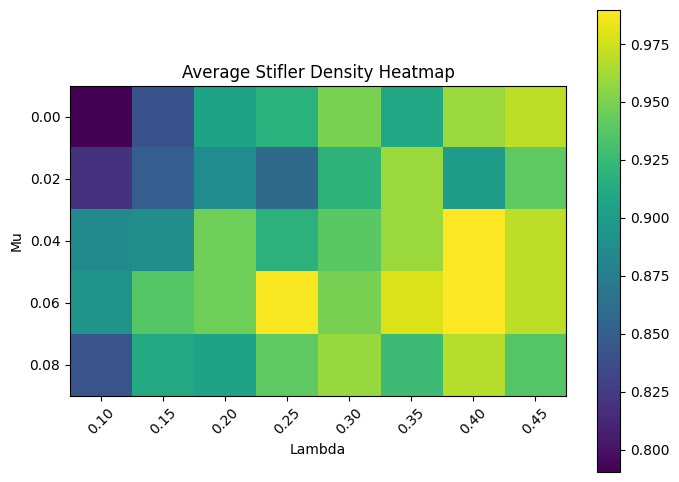

In [19]:
#Test 4
#n = 400, gamma = 2.75, kmin = 3, num_hyper_edges = 100
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.1, 0.02)
lambda_values = np.arange(0.1, 0.5, 0.05)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H4, degrees4, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av
        print("Average result -- ", "mu:", mu, "lam:", lam, "stifler_frac:", rho_R_av)

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='viridis', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

Average result --  mu: 0.0 lam: 0.1 stifler_frac: 0.8876000000000005
Average result --  mu: 0.0 lam: 0.15000000000000002 stifler_frac: 0.91935
Average result --  mu: 0.0 lam: 0.20000000000000004 stifler_frac: 0.9098250000000001
Average result --  mu: 0.0 lam: 0.25000000000000006 stifler_frac: 0.9100500000000001
Average result --  mu: 0.0 lam: 0.30000000000000004 stifler_frac: 0.9002249999999999
Average result --  mu: 0.0 lam: 0.3500000000000001 stifler_frac: 0.9400999999999999
Average result --  mu: 0.0 lam: 0.40000000000000013 stifler_frac: 0.950125
Average result --  mu: 0.0 lam: 0.45000000000000007 stifler_frac: 0.9002499999999998
Average result --  mu: 0.02 lam: 0.1 stifler_frac: 0.9091500000000008
Average result --  mu: 0.02 lam: 0.15000000000000002 stifler_frac: 0.9195
Average result --  mu: 0.02 lam: 0.20000000000000004 stifler_frac: 0.9598
Average result --  mu: 0.02 lam: 0.25000000000000006 stifler_frac: 0.950025
Average result --  mu: 0.02 lam: 0.30000000000000004 stifler_fra

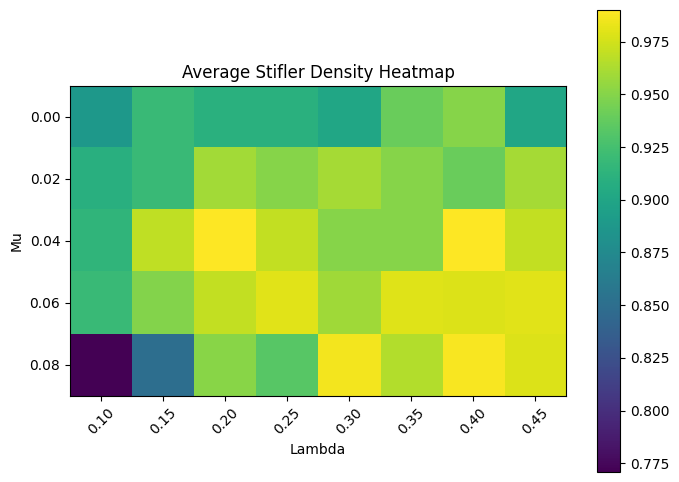

In [20]:
#Test 5
#n = 400, gamma = 2.5, kmin = 3, num_hyper_edges = 50
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.1, 0.02)
lambda_values = np.arange(0.1, 0.5, 0.05)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H5, degrees5, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av
        print("Average result -- ", "mu:", mu, "lam:", lam, "stifler_frac:", rho_R_av)

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='viridis', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

Average result --  mu: 0.0 lam: 0.1 stifler_frac: 0.857125
Average result --  mu: 0.0 lam: 0.15000000000000002 stifler_frac: 0.9097
Average result --  mu: 0.0 lam: 0.20000000000000004 stifler_frac: 0.9300499999999999
Average result --  mu: 0.0 lam: 0.25000000000000006 stifler_frac: 0.9601
Average result --  mu: 0.0 lam: 0.30000000000000004 stifler_frac: 0.9600749999999999
Average result --  mu: 0.0 lam: 0.3500000000000001 stifler_frac: 0.9201999999999999
Average result --  mu: 0.0 lam: 0.40000000000000013 stifler_frac: 0.9301749999999999
Average result --  mu: 0.0 lam: 0.45000000000000007 stifler_frac: 0.9401499999999998
Average result --  mu: 0.02 lam: 0.1 stifler_frac: 0.9063999999999998
Average result --  mu: 0.02 lam: 0.15000000000000002 stifler_frac: 0.8987121212121212
Average result --  mu: 0.02 lam: 0.20000000000000004 stifler_frac: 0.890475
Average result --  mu: 0.02 lam: 0.25000000000000006 stifler_frac: 0.9301499999999998
Average result --  mu: 0.02 lam: 0.30000000000000004 

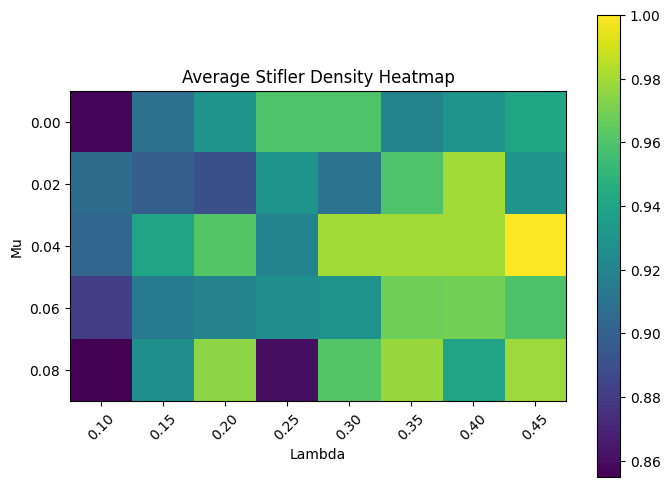

In [21]:
#Test 6
#n = 400, gamma = 2.5, kmin = 3, num_hyper_edges = 75
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.1, 0.02)
lambda_values = np.arange(0.1, 0.5, 0.05)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H6, degrees6, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av
        print("Average result -- ", "mu:", mu, "lam:", lam, "stifler_frac:", rho_R_av)

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='viridis', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()

In [ ]:
#Test 7
#n = 1000, gamma = 2.5, kmin = 3, num_hyper_edges = 100
n_samp = 100
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.1, 0.02)
lambda_values = np.arange(0.1, 0.5, 0.05)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H7, degrees7, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av
        print("Average result -- ", "mu:", mu, "lam:", lam, "stifler_frac:", rho_R_av)

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='viridis', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()